In [40]:
import os

os.environ["NVIDIA_VISIBLE_DEVICES"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [41]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [42]:
from keras.preprocessing.image import ImageDataGenerator
# Import TensorFlow
import tensorflow as tf


# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pathlib, os, random
#Import splitfolders
import splitfolders
from keras.preprocessing.image import ImageDataGenerator

In [52]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17650436164224804972
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252026676
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9065882721391256621
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [43]:
data_bs = './natural_images/'
data_bs = pathlib.Path(data_bs)
data_bs

WindowsPath('natural_images')

In [44]:
#splitfolders.ratio(data_bs, output='Imgs/', seed=123, ratio=(0.7, 0.15, 0.15), group_prefix=None)

In [45]:
batch_size = 128
img_height, img_width = 32, 32
input_shape = (img_height, img_width, 3)

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_ds = datagen.flow_from_directory('Imgs/train/', target_size=(img_height, img_width), subset='training', class_mode='sparse', batch_size=batch_size)

test_ds = datagen.flow_from_directory('Imgs/test/', target_size=(img_height, img_width), shuffle=False, class_mode='sparse', batch_size=batch_size)

val_ds = datagen.flow_from_directory('Imgs/val/', target_size=(img_height, img_width), shuffle=False, class_mode='sparse', batch_size=batch_size)

Found 4826 images belonging to 8 classes.
Found 1041 images belonging to 8 classes.
Found 1032 images belonging to 8 classes.


In [46]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [47]:
# Create a model object
model = tf.keras.models.Sequential()

In [48]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),strides=(1,1),
 padding='same',activation="relu", input_shape=input_shape))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),strides=(1,1),
 padding='same',activation="relu", input_shape=input_shape))


model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


In [49]:
# Add the output layer
model.add(tf.keras.layers.Dense(8, activation="softmax"))

In [50]:
# Compile the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [51]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(train_ds, epochs=50, batch_size=batch_size,
validation_data=val_ds)


Epoch 1/50
27/38 [====================>.........] - ETA: 2s - loss: 1.9029 - accuracy: 0.2436

KeyboardInterrupt: 

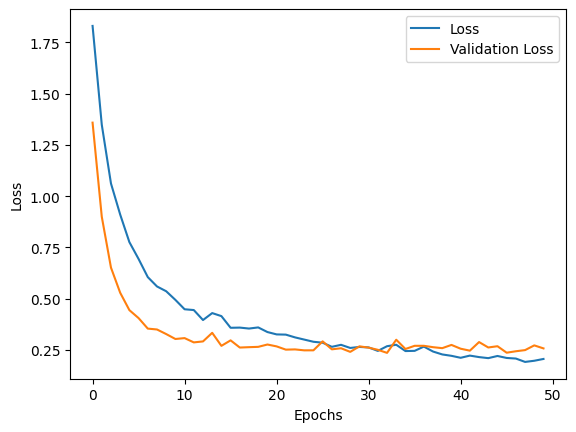

In [ ]:
plt.plot(results.history["loss"], label="Loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="Validation Loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

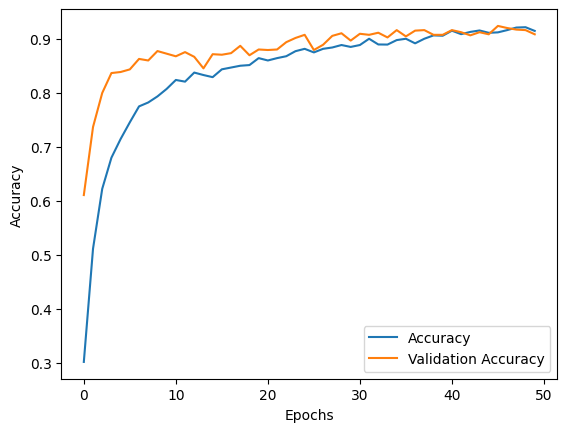

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="Accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="Validation Accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(test_ds)

9/9 [==============================] - 4s 458ms/step - loss: 0.3378 - accuracy: 0.8991


[0.3377898633480072, 0.8991354703903198]